In [55]:
import numpy as np
import yt
yt.funcs.mylog.setLevel(40)

In [56]:
ds = yt.load("sim_data/data.0130.3d.hdf5")
print(ds.current_time.in_units("kyr").round())

194.0


In [44]:
print(ds.field_list)
print(ds.domain_width.in_units("au"))
print(ds.particle_types)

[('chombo', 'X-magnfield'), ('chombo', 'X-momentum'), ('chombo', 'Y-magnfield'), ('chombo', 'Y-momentum'), ('chombo', 'Z-magnfield'), ('chombo', 'Z-momentum'), ('chombo', 'density'), ('chombo', 'energy-density'), ('chombo', 'gravitational-potential'), ('chombo', 'radiation-energy-density'), ('chombo', 'tracer1')]
[53476.69696 53476.69696 53476.69696] au
('io',)


In [ ]:
for t, fnum in enumerate([110, 120, 130, 140]):
    fname = "sim_data/data.{:04d}.3d.hdf5".format(fnum)
    ds = yt.load(fname)
    for axis in ['x', 'y', 'z']:
        data = yt.ProjectionPlot(ds, axis, "tracer1").frb[('chombo','tracer1')]
        data = np.array(data)
        np.save("sim_data/{}_{}".format(axis, t), data)

/opt/anaconda3/envs/sf/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


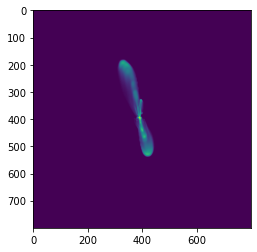

In [75]:
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm

for t in range(1):
    data = np.load("sim_data/z_{}.npy".format(t))
    plt.imshow(data, norm=SymLogNorm(linthresh=.01))
    plt.show()